In [1]:
import krusell_smith as ks

## 定常状態の計算

In [2]:
%time ss = ks.ks_ss(nA=500,nS=5)

Wall time: 2.34 s


In [3]:
import matplotlib.pyplot as plt

政策関数は以下の様にして求められる.

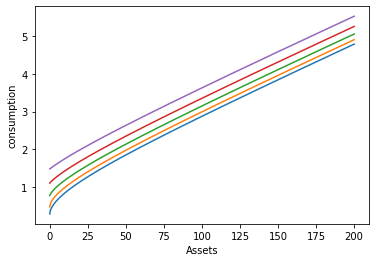

In [4]:
plt.plot(ss['a_grid'], ss['c'].T)
plt.xlabel('Assets'), plt.ylabel('consumption')
plt.show()

資産の分布関数は以下の様にして図示できる.

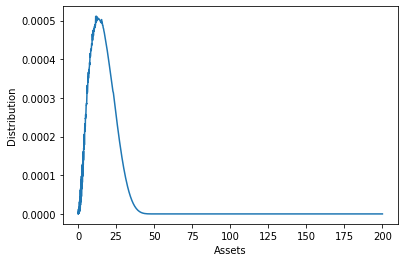

In [5]:
plt.plot(ss['a_grid'], ss['D'][4])
plt.xlabel('Assets'), plt.ylabel('Distribution')
plt.show()

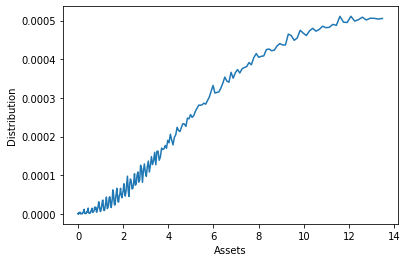

In [6]:
plt.plot(ss['a_grid'][:300], ss['D'][4][:300])
plt.xlabel('Assets'), plt.ylabel('Distribution')
plt.show()

## インパルス応答関数

In [7]:
import jacobian as jac

In [8]:
T = 300
G = jac.get_G(block_list=[ks.firm, ks.mkt_clearing, ks.household],
               exogenous=['Z'],
               unknowns=['K'],
               targets=['asset_mkt'],
               T=T, ss=ss)

In [9]:
import numpy as np

技術ショックの利子率への応答

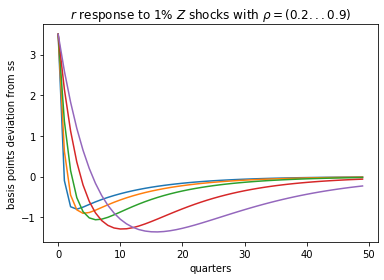

In [10]:
rhos = np.array([0.2, 0.4, 0.6, 0.8, 0.9])
dZ = 0.01*ss['Z']*rhos**(np.arange(T)[:, np.newaxis]) # get T*5 matrix of dZ
dr = G['r']['Z'] @ dZ
plt.plot(10000*dr[:50, :])
plt.title(r'$r$ response to 1% $Z$ shocks with $\rho=(0.2 ... 0.9)$')
plt.ylabel(r'basis points deviation from ss')
plt.xlabel(r'quarters')
plt.show()

技術ショックの資本への応答

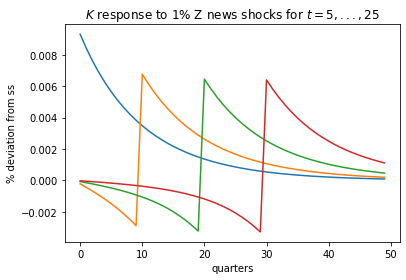

In [11]:
dZ = 0.01*(np.arange(T)[:, np.newaxis] == np.array([0, 10, 20, 30]))
dK = G['K']['Z'] @ dZ
plt.plot(dK[:50])
plt.title('$K$ response to 1% Z news shocks for $t=5,...,25$')
plt.ylabel(r'% deviation from ss')
plt.xlabel(r'quarters')
plt.show()